**End to End Mobile Price Classification**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Mobile Price Classification/train_mobile.csv")
df.head(5)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Exploratory Data Analysis

In [3]:
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

0



```
Observation : we have no Missing values , no duplicates ,and no categorical features
```



In [4]:
std_values = df.std()
std_values

,0
battery_power,439.418206
blue,0.500100
clock_speed,0.816004
dual_sim,0.500035
fc,4.341444
four_g,0.499662
int_memory,18.145715
m_dep,0.288416
mobile_wt,35.399655
n_cores,2.287837




```
Obesrvation : we have 0 std values
```



Extracting discrete features

In [5]:
discrete_features = [feature for feature in df.columns if df[feature].dtype =='int64' and not(any(sub in feature.lower() for sub in ['height', 'weight', 'wt', 'ht']))]
df[discrete_features].head()
df[discrete_features].info()
target = df['price_range']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   battery_power  2000 non-null   int64
 1   blue           2000 non-null   int64
 2   dual_sim       2000 non-null   int64
 3   fc             2000 non-null   int64
 4   four_g         2000 non-null   int64
 5   int_memory     2000 non-null   int64
 6   n_cores        2000 non-null   int64
 7   pc             2000 non-null   int64
 8   px_width       2000 non-null   int64
 9   ram            2000 non-null   int64
 10  sc_h           2000 non-null   int64
 11  sc_w           2000 non-null   int64
 12  talk_time      2000 non-null   int64
 13  three_g        2000 non-null   int64
 14  touch_screen   2000 non-null   int64
 15  wifi           2000 non-null   int64
 16  price_range    2000 non-null   int64
dtypes: int64(17)
memory usage: 265.8 KB


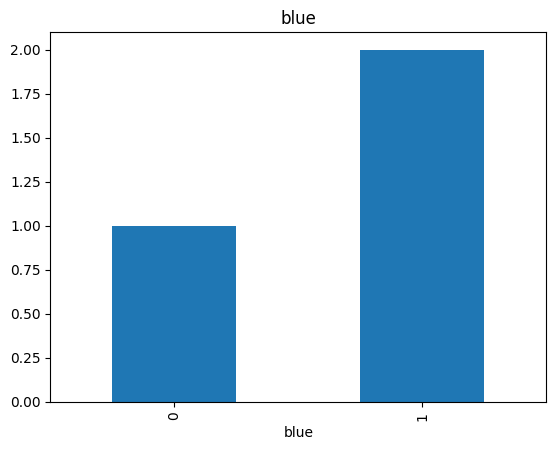

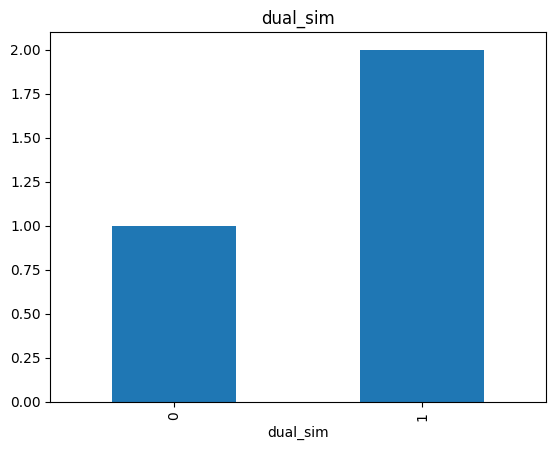

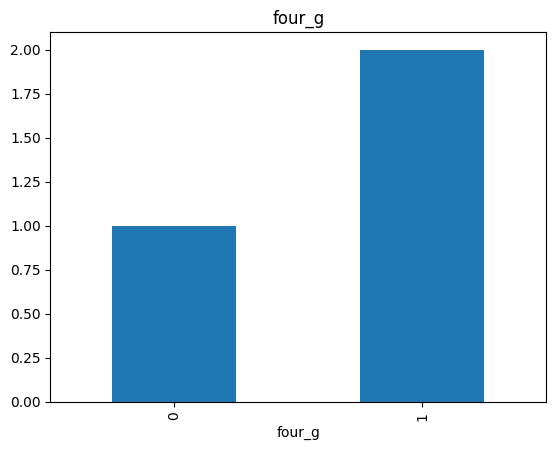

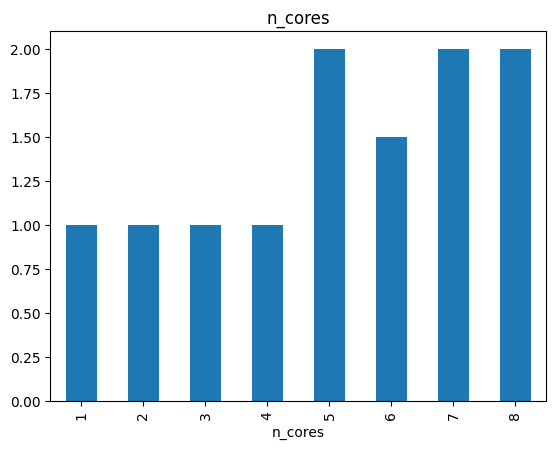

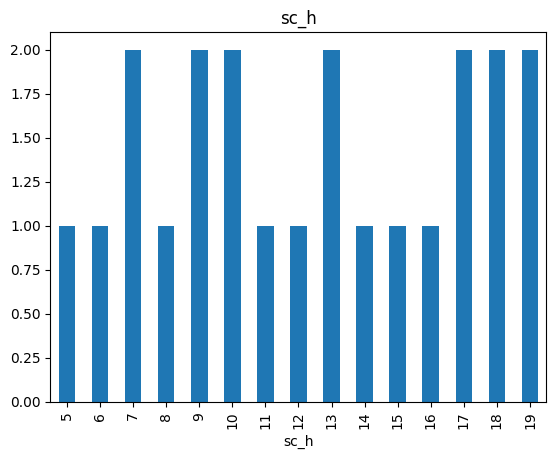

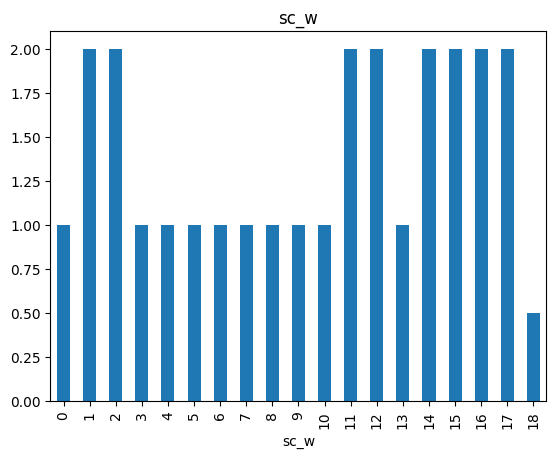

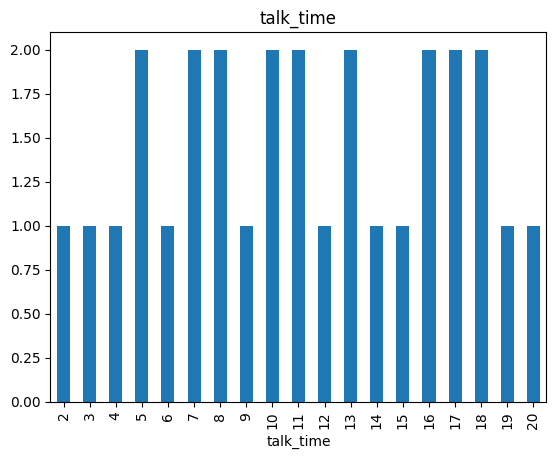

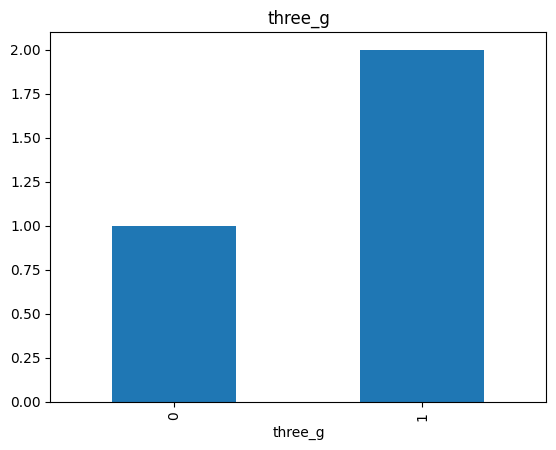

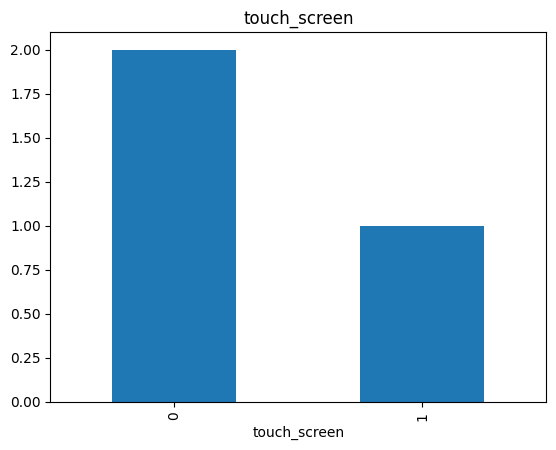

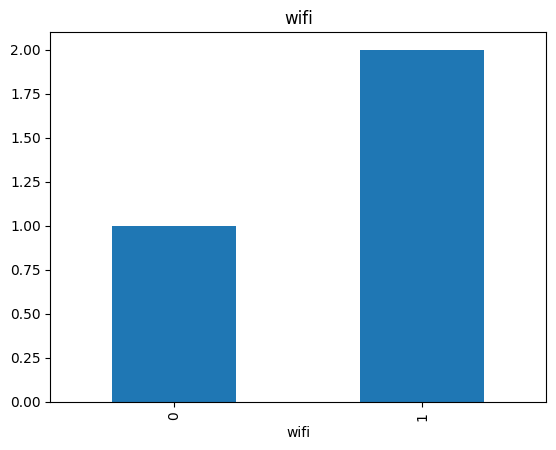

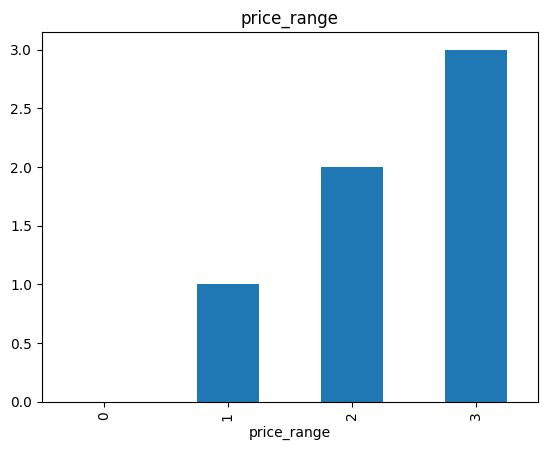

In [6]:
discrete_features_to_analyze = [feature for feature in discrete_features if df[feature].nunique() < 20]
for feature in discrete_features_to_analyze:
  data = df.copy()
  data.groupby(feature)['price_range'].median().plot.bar()
  plt.title(feature)
  plt.show()

Extracting continious features

In [7]:
continious_features = [feature for feature in df.columns if feature not in discrete_features]
df[continious_features].head()

,clock_speed,m_dep,mobile_wt,px_height
0,2.2,0.6,188,20
1,0.5,0.7,136,905
2,0.5,0.9,145,1263
3,2.5,0.8,131,1216
4,1.2,0.6,141,1208


apply to them log transformation to visualize

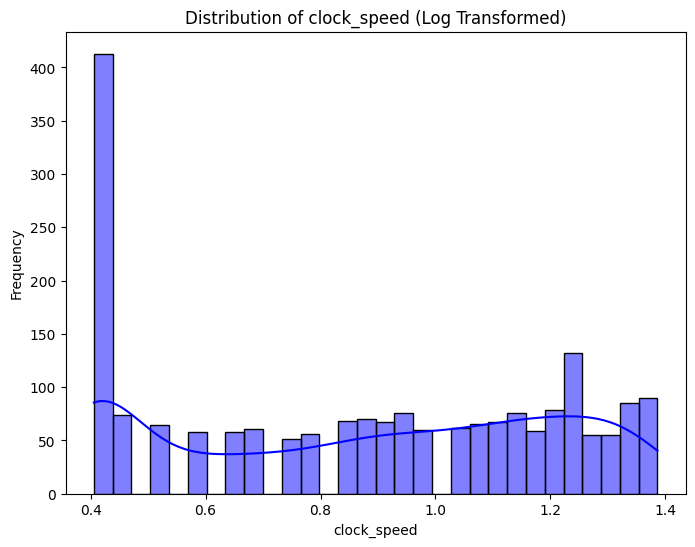

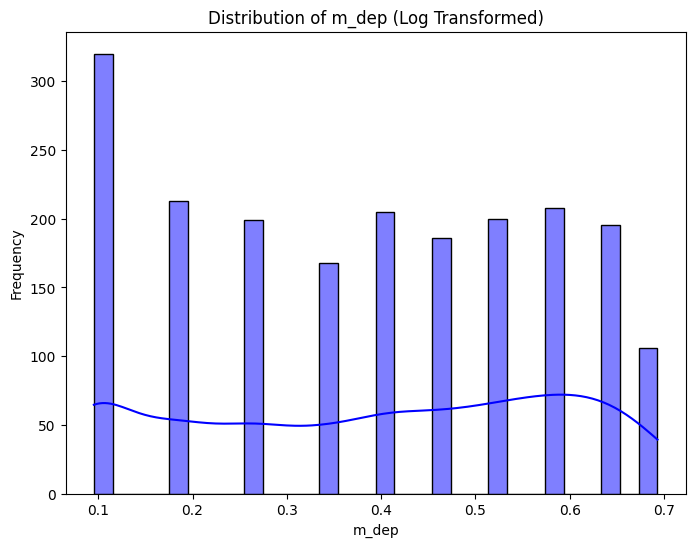

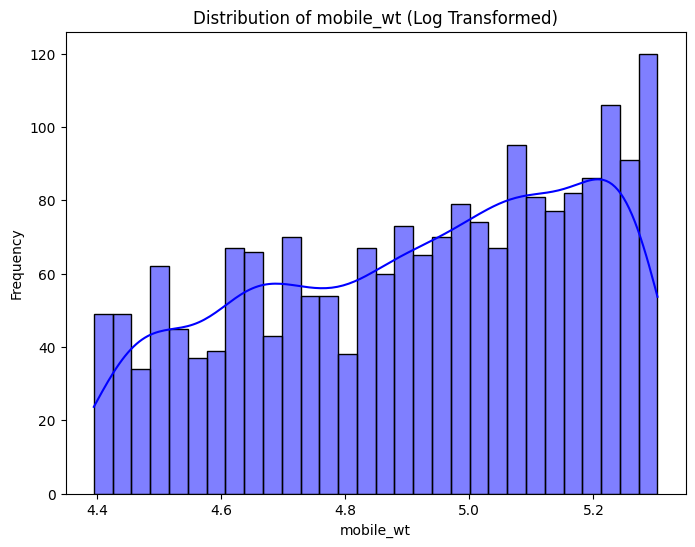

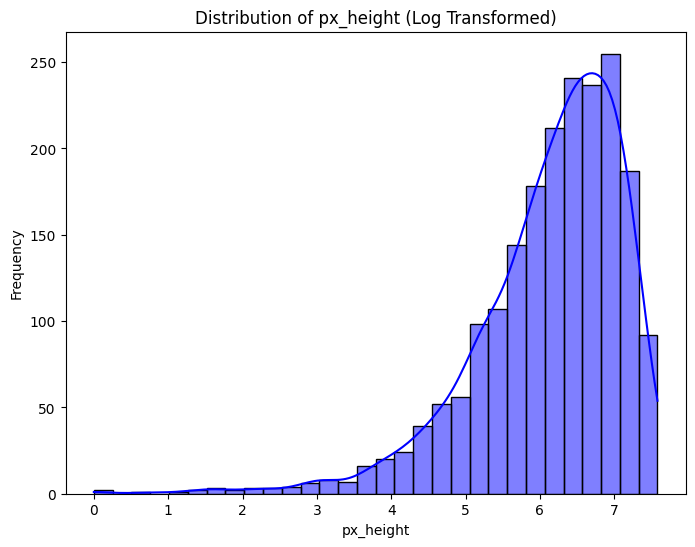

In [8]:
for feature in continious_features:
    data = df.copy()
    data[feature] = np.log(data[feature] + 1)
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True, bins=30, color="blue")
    plt.title(f"Distribution of {feature} (Log Transformed)")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()


Checking for Outliers

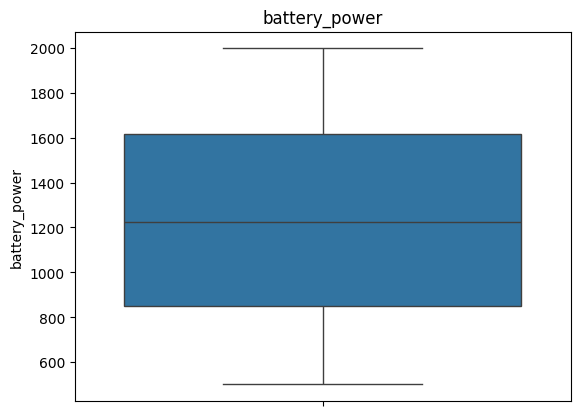

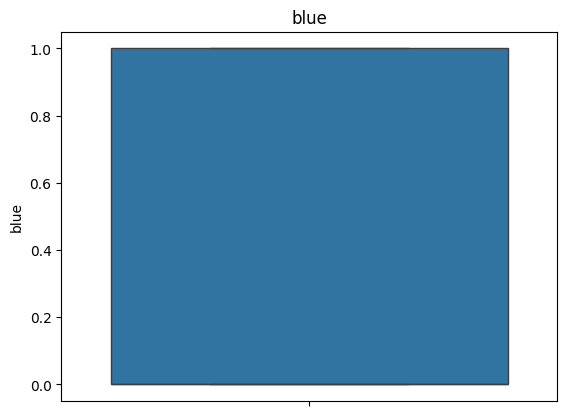

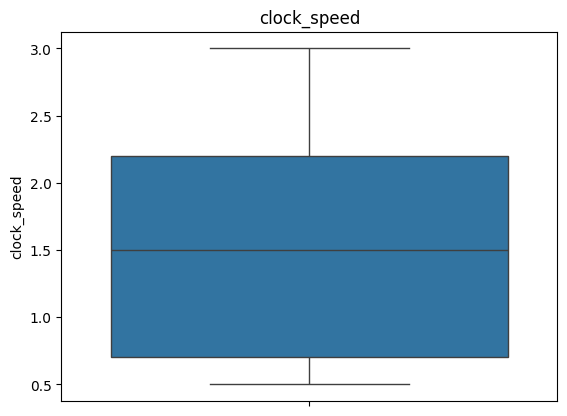

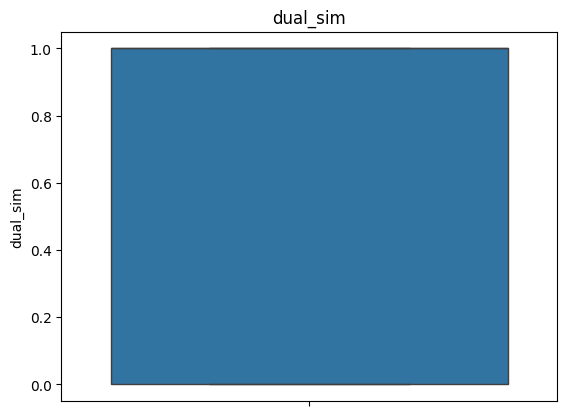

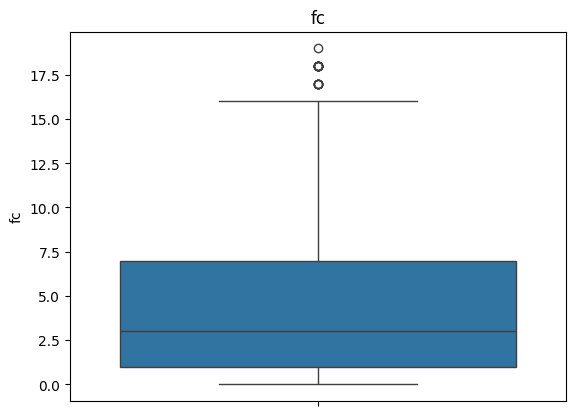

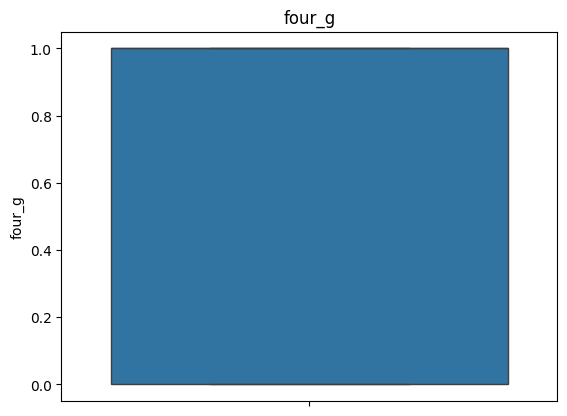

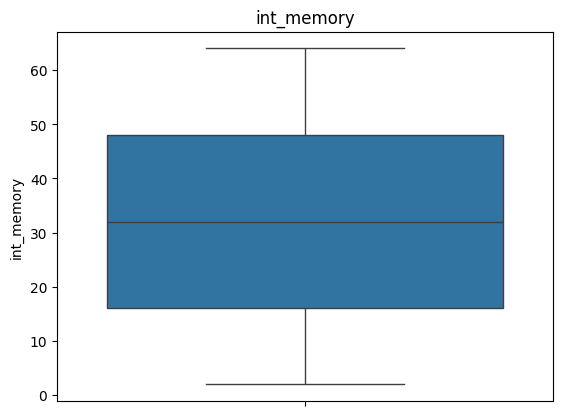

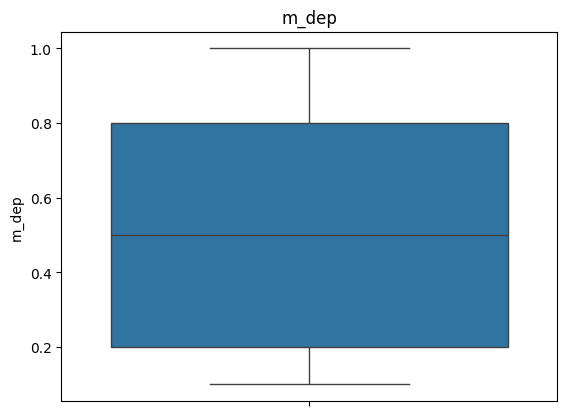

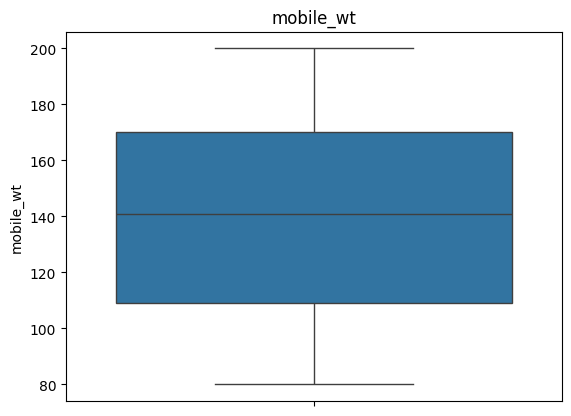

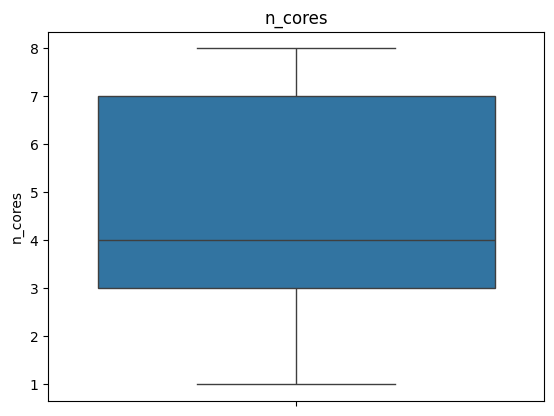

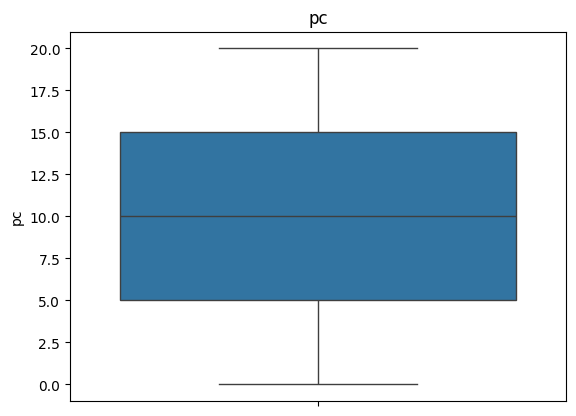

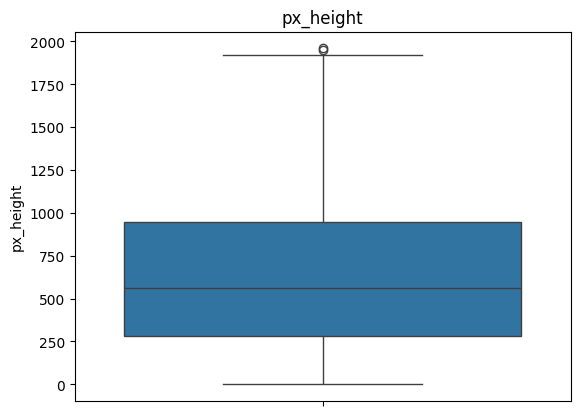

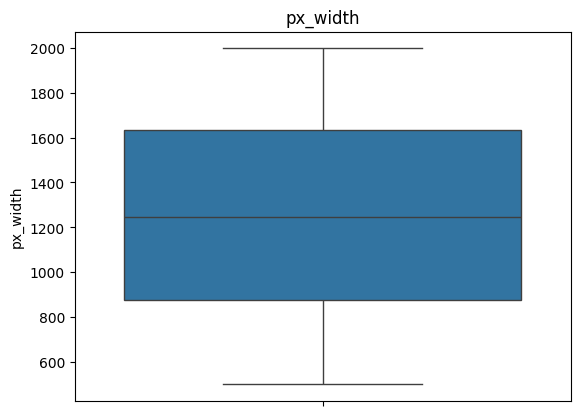

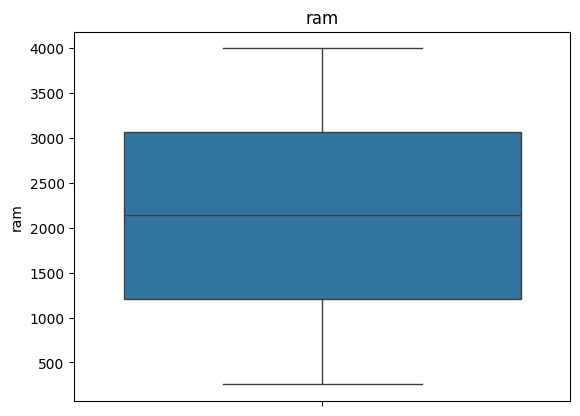

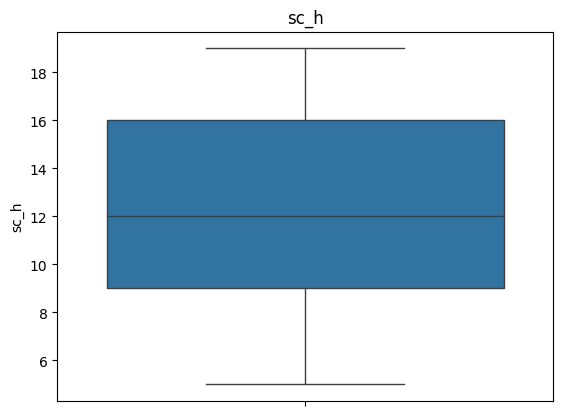

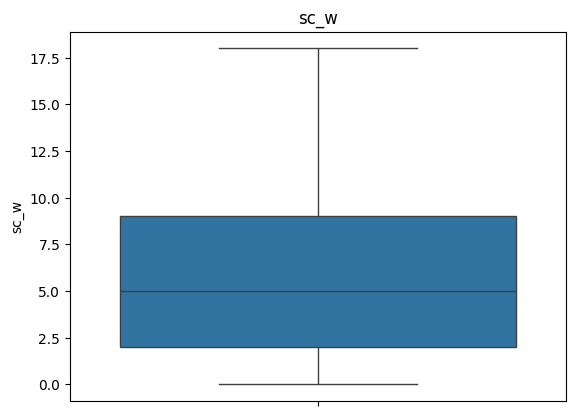

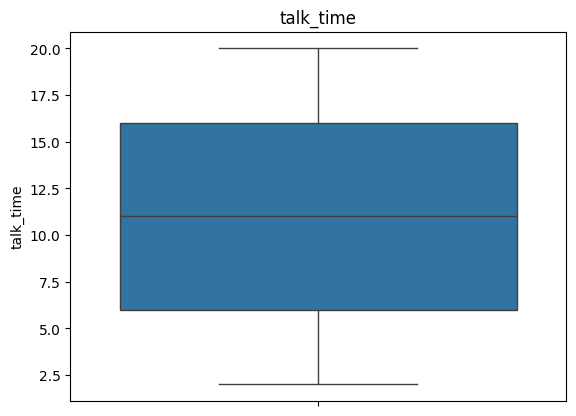

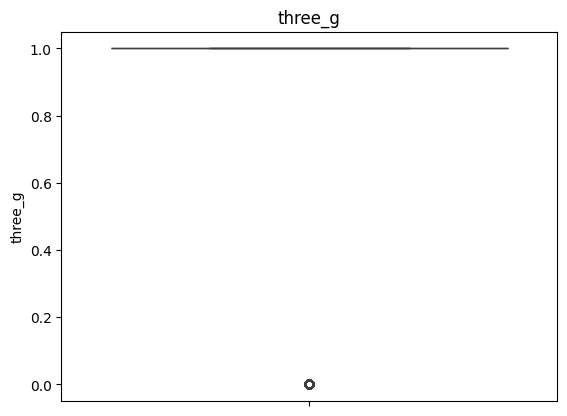

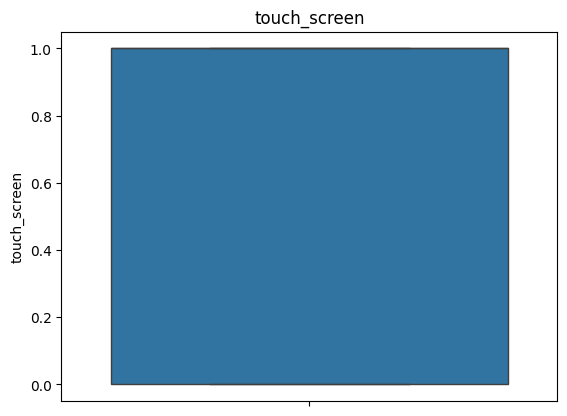

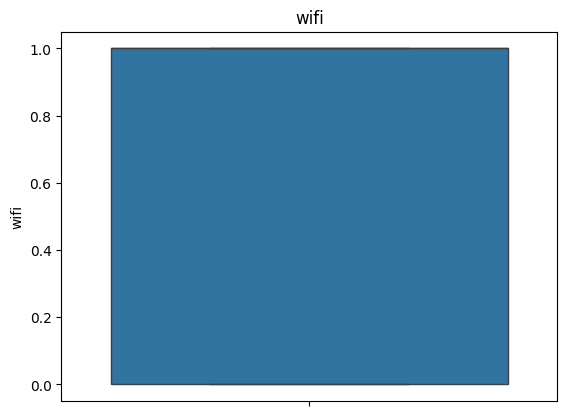

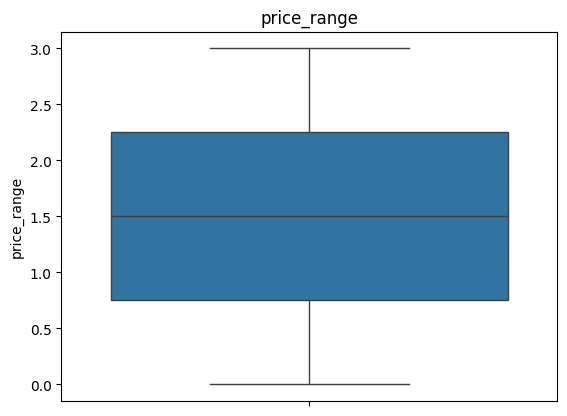

In [9]:
for feature in df.columns :
  sns.boxplot(df[feature])
  plt.title(feature)
  plt.show()



```
Observation : the data got outliers
```



Checking whether the data balnced or not

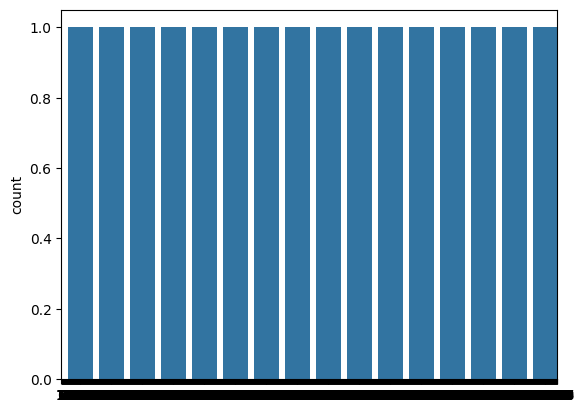

In [10]:
df['price_range'].value_counts()

sns.countplot(df['price_range'])
plt.show()



```
Observation : The data is balanced
```



Correlation

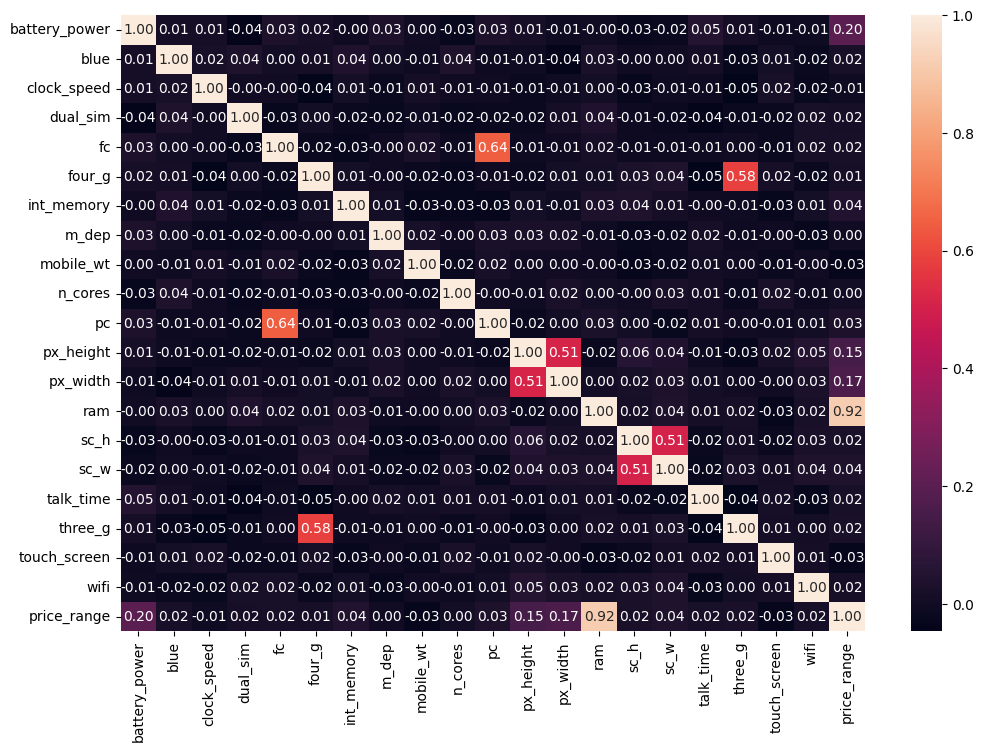

In [11]:
correlation_matrix = df.corr()
correlation_matrix

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True,fmt='.2f')
plt.show()




```
Observation : their is correlation between some features
```



**Feature Engineering**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Feature Transformation

In [13]:
features_to_transform = [feature for feature in df.columns if df[feature].nunique() != 2 and feature != 'price_range']
df[features_to_transform].head()

from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
df[features_to_transform] = normalizer.fit_transform(df[features_to_transform])
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902597,0,0.830779,0,-0.762495,0,-1.380644,0.340740,1.349249,-1.101971,...,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,0,0,1,1
1,-0.495139,1,-1.253064,1,-0.992890,1,1.155024,0.687548,-0.120059,-0.664768,...,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,1,1,0,2
2,-1.537686,1,-1.253064,1,-0.532099,1,0.493546,1.381165,0.134244,0.209639,...,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,1,1,0,2
3,-1.419319,1,1.198517,0,-0.992890,0,-1.215274,1.034357,-0.261339,0.646842,...,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,1,0,0,2
4,1.325906,1,-0.395011,0,2.002254,1,0.658915,0.340740,0.021220,-1.101971,...,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,1,1,0,1


Handling Outliers

In [14]:
for feature in df.columns:
    data = df[feature]
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5* IQR
    upper_limit = Q3 + 1.5*IQR
    df[feature] = np.where(df[feature] < lower_limit, lower_limit, df[feature])

Feature Selection

In [23]:

from sklearn.linear_model import LogisticRegressionCV

X = df.drop('price_range', axis=1)
y = df['price_range']

model = LogisticRegressionCV(penalty='l1', solver='saga', cv=5, max_iter=1000, Cs=[0.1])
model.fit(X, y)

coefficients = model.coef_.mean(axis=0)
selected_features = X.columns[coefficients != 0]

X_selected = X[selected_features]
X_selected.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   float64
 1   int_memory     2000 non-null   float64
 2   m_dep          2000 non-null   float64
 3   mobile_wt      2000 non-null   float64
 4   n_cores        2000 non-null   float64
 5   px_height      2000 non-null   float64
 6   px_width       2000 non-null   float64
 7   ram            2000 non-null   float64
 8   sc_h           2000 non-null   float64
dtypes: float64(9)
memory usage: 140.8 KB


Modeling

In [27]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.svm import SVC
x_train , x_test , y_train , y_test = train_test_split(X_selected,y,test_size=0.2 ,random_state=100)
svc = SVC()
param_grid = {
    'kernel': ['linear', 'sigmoid', 'rbf'],
    'gamma': ['scale', 'auto'],
    'C': [0.1, 1, 10]
}

grid_search = GridSearchCV(svc, param_grid, cv=5, verbose=1)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_params

Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}

In [32]:
model = SVC(C=10 , gamma='scale' ,kernel='linear')
model.fit(x_train,y_train)
y_predicted = model.predict(x_test)
y_predicted

array([0., 1., 1., 3., 2., 3., 3., 2., 3., 0., 0., 2., 3., 3., 0., 2., 2.,
       3., 2., 0., 0., 3., 1., 0., 0., 1., 3., 0., 2., 2., 0., 3., 0., 1.,
       0., 3., 3., 2., 1., 3., 3., 3., 0., 0., 3., 3., 2., 0., 1., 2., 3.,
       2., 3., 1., 1., 3., 1., 3., 1., 0., 3., 2., 3., 0., 2., 0., 0., 3.,
       3., 2., 0., 0., 2., 1., 2., 3., 0., 3., 2., 3., 1., 0., 2., 0., 2.,
       2., 1., 2., 3., 3., 2., 3., 3., 2., 0., 2., 3., 1., 2., 1., 0., 0.,
       3., 3., 2., 0., 0., 1., 0., 1., 1., 1., 3., 2., 0., 3., 1., 3., 1.,
       1., 3., 1., 0., 1., 3., 2., 3., 2., 0., 3., 1., 0., 1., 2., 3., 1.,
       3., 2., 0., 1., 3., 0., 2., 3., 1., 2., 2., 2., 0., 1., 0., 3., 2.,
       2., 1., 0., 1., 3., 1., 1., 3., 2., 3., 0., 0., 3., 0., 2., 3., 0.,
       2., 0., 2., 1., 1., 2., 2., 1., 3., 1., 0., 2., 1., 0., 0., 3., 2.,
       2., 3., 2., 2., 1., 2., 1., 2., 2., 3., 1., 1., 1., 3., 1., 2., 1.,
       3., 0., 1., 3., 3., 2., 0., 1., 2., 0., 1., 2., 3., 0., 2., 3., 0.,
       3., 0., 0., 1., 2.

**Evaluation**

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_predicted)
print(f"Accuracy: {accuracy:.4f}")

report = classification_report(y_test, y_predicted)
print("Classification Report:\n", report)

Accuracy: 0.9650
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       100
         1.0       0.96      0.93      0.94        99
         2.0       0.94      0.96      0.95        96
         3.0       0.99      0.98      0.99       105

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.97      0.96      0.96       400



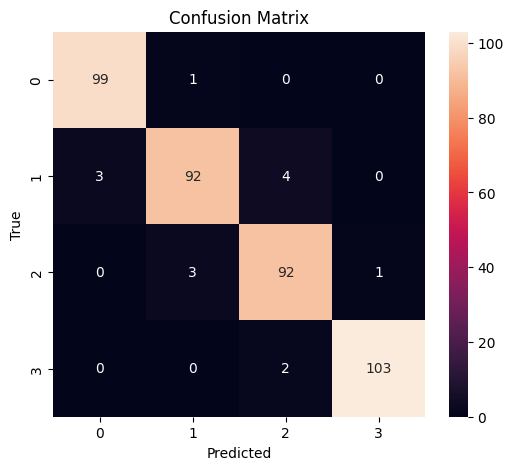

In [39]:
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



```
Observation : we have good accuracy ,and good results on confusion matrix
```

